# 5.1.3 Эффект Рамзауэра

In [408]:
import sys
sys.path.append('../../')

import numpy as np
import matplotlib.pyplot as plt
import math
from common import *

In [409]:
def get_x0_with_error(coeff, cov):
  a = coeff[0]
  b = coeff[1]
  Sa, Sb, Sc = cov[0,0], cov[1,1], cov[2,2]
  Sab = cov[0,1]

  x0 = -b/(2*a)
  var_x0 = ( (b/(2*a**2))**2 * Sa
          + (1/(2*a))**2 * Sb
          - (b/(a**3)) * (Sab/2) )   # same as - (b/(2*a**3))*Sab
  sx0 = np.sqrt(var_x0)
  return (x0, sx0)

In [410]:
electron = 1.6 * 10**-19
m_electron = 9.11 * 10**-31
U0 = 2.5 * electron # eV
h_plank = 6.626 * 10**-34

In [411]:
V_nakal = 3.07 # V
V_max   = 1.5 # div
V_min   = 3.8 # div
V_izlom = 5.8 # div - proboy
sigma_V = 0.2 # div

V_max   *= 2 # V
V_min   *= 2 # V
V_izlom *= 2 # V
sigma_V *= 2 # V

E1      = V_max * electron
E2      = V_min * electron
sigma_E = sigma_V * electron
V_max, V_min, sigma_V
# E1 / 1e-19, E2 / 1e-19, sigma_E / 1e-19
np.mean([sigma_V/V_max, sigma_V/V_min])

np.float64(0.09298245614035087)

In [412]:
# l = h_plank / (2 * np.sqrt(2 * m_electron * (E1 + U0)))
# l = 3 * h_plank / (4 * np.sqrt(2 * m_electron * (E2 + U0)))
l =  h_plank * np.sqrt(5) / np.sqrt(32 * m_electron * (E2 - E1))
sigma_l = h_plank * np.sqrt(5) / np.sqrt(32 * m_electron) * np.sqrt((sigma_E / np.sqrt(E2 - E1)**3)**2)

U_0 = 4/5*E2 - 9/5*E1
latex_measurement("U_0", U_0 / electron, np.sqrt((4/5 * sigma_E)**2 + (9/5 * sigma_E)**2) / electron, "эВ", 2)
latex_measurement("l", l, sigma_l, "м", 2)
latex_measurement("U_\\text{пробой}", V_izlom, sigma_V, "эВ", 2)

$U_0 = (6.80 \pm 7.88)\ \times 10^{-1} ~\text{эВ} \ (\varepsilon \approx 115.87\ \%)$
$l = (3.20 \pm 0.28)\ \times 10^{-10} ~\text{м} \ (\varepsilon \approx 8.70\ \%)$
$U_\text{пробой} = (1.16 \pm 0.04)\ \times 10^{1} ~\text{эВ} \ (\varepsilon \approx 3.45\ \%)$


'$U_\\text{пробой} = (1.16 \\pm 0.04)\\ \\times 10^{1} ~\\text{эВ} \\ (\\varepsilon \\approx 3.45\\ \\%)$'

In [413]:
V_nakal = 2.86 # V
V_max = 1.2 # div
V_min = 3.8 # div

V_izlom = 5.8 # div

In [414]:
V_max   *= 2 # V
V_min   *= 2 # V
V_izlom *= 2 # V
sigma_V *= 2 # V

E1      = V_max * electron
E2      = V_min * electron
sigma_E = sigma_V * electron

In [415]:
l = h_plank / (2 * np.sqrt(2 * m_electron * (E1 + U0)))
l = 3 * h_plank / (4 * np.sqrt(2 * m_electron * (E2 + U0)))
l =  h_plank * np.sqrt(5) / np.sqrt(32 * m_electron * (E2 - E1))
sigma_l = h_plank * np.sqrt(5) / np.sqrt(32 * m_electron) * np.sqrt(2 * (sigma_E / np.sqrt(E2 - E1)**3)**2)

U_0 = 4/5*E2 - 9/5*E1
latex_measurement("U_0", U_0 / electron, np.sqrt((4/5 * sigma_E)**2 + (9/5 * sigma_E)**2) / electron, "эВ", 2)
latex_measurement("l", l, sigma_l, "м", 2)
latex_measurement("U_\\text{пробой}", V_izlom, sigma_V, "эВ", 2)

$U_0 = (1.76 \pm 1.58)\ \text{эВ} \ (\varepsilon \approx 89.54\ \%)$
$l = (3.01 \pm 0.65)\ \times 10^{-10} ~\text{м} \ (\varepsilon \approx 21.76\ \%)$
$U_\text{пробой} = (1.16 \pm 0.08)\ \times 10^{1} ~\text{эВ} \ (\varepsilon \approx 6.90\ \%)$


'$U_\\text{пробой} = (1.16 \\pm 0.08)\\ \\times 10^{1} ~\\text{эВ} \\ (\\varepsilon \\approx 6.90\\ \\%)$'

## II.7 Динамический режим

In [416]:
V_2 = []
I_2 = []

## III.4 Измерение ВАХ для 2 значений напряжений накала (стат. режим)

аппроксимировать ВАХ параболами вблизи максимума по четным и по нечетным точкам отдельно

### Первая серия измерений

In [417]:
I_nakala_1 = 3.09 # V
V_katod_1 = [0.06, 0.42, 0.80, 1.22, 1.62, 2.00, 2.40, 2.82, 3.20,  3.62,  4.04, 4.40, 4.81, 5.22, 5.64,  6.04, 6.40, 6.82, 7.25, 7.62, 8.01, 8.43, 8.84, 9.21, 9.62, 10.08, 10.48, 1.81, 1.91, 2.11, 2.22,  2.3, 2.51, 2.61, 2.71, 2.92, 3.02, 3.12,  3.3, 3.43, 3.52,  3.62, 2.53, 2.44,  2.3, 2.22,  2.1, 2.15, 2.26, 2.35, 2.39] # V
I_anod_1  = [   0,    0,    0, 0.04, 2.36, 45.1, 96.6, 92.6, 86.4, 79.93, 72.13, 69.3, 65.6, 62.8, 60.3, 58.54, 57.5, 57.0, 56.5, 56.7, 57.4, 61.2, 63.8, 66.3, 67.6,  71.5,  78.2, 12.7, 25.9, 64.7, 80.9, 88.3, 97.3, 96.7, 95.8, 91.2, 89.2, 87.4, 84.5, 83.0, 81.8, 80.60, 99.1, 98.3, 90.6, 82.5, 63.6, 73.5, 87.7, 95.8, 98.2] # mV
sigma_V_katod = .01 # V
sigma_V_anod  = .1 # mV

In [418]:
VAX_1 = list(zip(V_katod_1, I_anod_1))
VAX_1_ = sorted(VAX_1, key=lambda x: x[0])

V_katod_1_ = [vax[0] for vax in VAX_1_]
I_anod_1_ = [vax[1] for vax in VAX_1_]

[i[0] for i in VAX_1_], [i[1] for i in VAX_1_]

([0.06,
  0.42,
  0.8,
  1.22,
  1.62,
  1.81,
  1.91,
  2.0,
  2.1,
  2.11,
  2.15,
  2.22,
  2.22,
  2.26,
  2.3,
  2.3,
  2.35,
  2.39,
  2.4,
  2.44,
  2.51,
  2.53,
  2.61,
  2.71,
  2.82,
  2.92,
  3.02,
  3.12,
  3.2,
  3.3,
  3.43,
  3.52,
  3.62,
  3.62,
  4.04,
  4.4,
  4.81,
  5.22,
  5.64,
  6.04,
  6.4,
  6.82,
  7.25,
  7.62,
  8.01,
  8.43,
  8.84,
  9.21,
  9.62,
  10.08,
  10.48],
 [0,
  0,
  0,
  0.04,
  2.36,
  12.7,
  25.9,
  45.1,
  63.6,
  64.7,
  73.5,
  80.9,
  82.5,
  87.7,
  88.3,
  90.6,
  95.8,
  98.2,
  96.6,
  98.3,
  97.3,
  99.1,
  96.7,
  95.8,
  92.6,
  91.2,
  89.2,
  87.4,
  86.4,
  84.5,
  83.0,
  81.8,
  79.93,
  80.6,
  72.13,
  69.3,
  65.6,
  62.8,
  60.3,
  58.54,
  57.5,
  57.0,
  56.5,
  56.7,
  57.4,
  61.2,
  63.8,
  66.3,
  67.6,
  71.5,
  78.2])

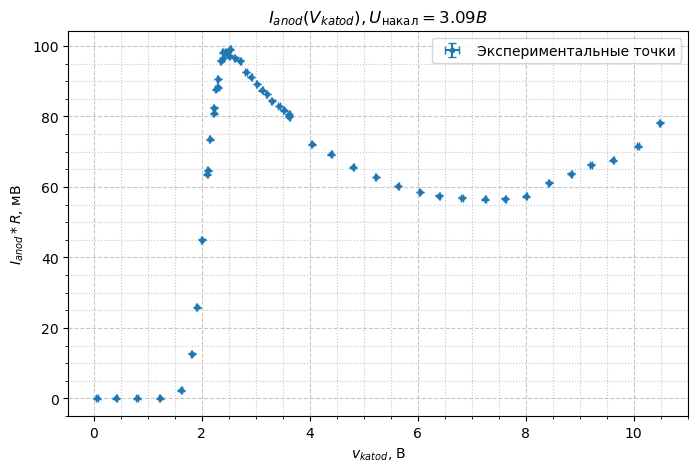

In [419]:
fig1, ax1 = plot(V_katod_1_, I_anod_1_, [sigma_V_katod] * len(V_katod_1_), [sigma_V_anod] * len(I_anod_1_),
             "$v_{katod}$, В", "$I_{anod} * R$, мВ", "$I_{anod}(V_{katod}), U_{\\text{накал}} = 3.09 В$")

In [420]:
parabola_1_even_max, cov_1_even_max = np.polyfit(V_katod_1_[8:24:2], I_anod_1_[8:24:2], deg=2, w=[1/sigma_V_anod] * len(V_katod_1_[8:24:2]), cov=True)
parabola_1_odd_max,  cov_1_odd_max  = np.polyfit(V_katod_1_[9:24:2], I_anod_1_[9:24:2], deg=2, w=[1/sigma_V_anod] * len(V_katod_1_[9:24:2]), cov=True)

x0_even_max, err_even_max = get_x0_with_error(parabola_1_even_max, cov_1_even_max)
x0_odd_max, err_odd_max   = get_x0_with_error(parabola_1_odd_max, cov_1_odd_max)

V_max = np.mean([x0_even_max, x0_odd_max])
sigma_V_max = np.sqrt(err_even_max ** 2 + err_odd_max ** 2)
latex_measurement("x0_{max}", V_max, sigma_V_max, "В", 2)

parabola_1_even_min, cov_1_even_min = np.polyfit(V_katod_1_[34:49:2], I_anod_1_[34:49:2], deg=2, w=[1/sigma_V_anod] * len(V_katod_1_[34:49:2]), cov=True)
parabola_1_odd_min,  cov_1_odd_min  = np.polyfit(V_katod_1_[35:49:2], I_anod_1_[35:49:2], deg=2, w=[1/sigma_V_anod] * len(V_katod_1_[35:49:2]), cov=True)

x0_even_min, err_even_min = get_x0_with_error(parabola_1_even_min, cov_1_even_min)
x0_odd_min, err_odd_min   = get_x0_with_error(parabola_1_odd_min, cov_1_odd_min)

V_min = np.mean([x0_even_min, x0_odd_min])
sigma_V_min = np.sqrt(err_even_min ** 2 + err_odd_min ** 2)
latex_measurement("x0_{min}", V_min, sigma_V_min, "В", 2)

poly1even_max = np.poly1d(parabola_1_even_max)
poly1odd_max  = np.poly1d(parabola_1_odd_max)

poly1even_min = np.poly1d(parabola_1_even_min)
poly1odd_min  = np.poly1d(parabola_1_odd_min)

$x0_{max} = (2.52 \pm 0.02)\ \text{В} \ (\varepsilon \approx 0.81\ \%)$
$x0_{min} = (7.01 \pm 0.06)\ \text{В} \ (\varepsilon \approx 0.84\ \%)$


In [421]:
E2 = V_min * electron
E1 = V_max * electron

l =  h_plank * np.sqrt(5) / np.sqrt(32 * m_electron * (E2 - E1))
sigma_l = h_plank * np.sqrt(5) / np.sqrt(32 * m_electron) * np.sqrt(((sigma_V_max * electron + sigma_V_min * electron) / np.sqrt(E2 - E1)**3)**2)
latex_measurement("l", l, sigma_l, "м", 2)

U_0 = 4/5*E2 - 9/5*E1
latex_measurement("U_0", U_0 / electron, np.sqrt((4/5*sigma_V_min * electron)**2 + (9/5 * sigma_V_max * electron)**2) / electron, "eV", 2)

V_max

$l = (3.24 \pm 0.06)\ \times 10^{-10} ~\text{м} \ (\varepsilon \approx 1.76\ \%)$
$U_0 = (1.08 \pm 0.06)\ \text{eV} \ (\varepsilon \approx 5.51\ \%)$


np.float64(2.5169594626115463)

In [422]:
x0_even_max = - parabola_1_even_max[1] / (2 * parabola_1_even_max[0])
x0_odd_max  = - parabola_1_odd_max[1]  / (2 * parabola_1_odd_max[0])

x0_even_min = - parabola_1_even_min[1] / (2 * parabola_1_even_min[0])
x0_odd_min  = - parabola_1_odd_min[1]  / (2 * parabola_1_odd_min[0])

In [423]:
x_fit_max = np.linspace(2, 3, 100)
x_fit_min = np.linspace(4, 10, 100)
ax1.plot(x_fit_max, poly1even_max(x_fit_max), label='max parabola (even)')
ax1.plot(x_fit_max, poly1odd_max(x_fit_max), label='max parabola (odd)')
ax1.plot(x_fit_min, poly1even_min(x_fit_min), label='min parabola (even)')
ax1.plot(x_fit_min, poly1odd_min(x_fit_min), label='min parabola (odd)')
ax1.legend()
plt

<module 'matplotlib.pyplot' from '/usr/lib/python3.13/site-packages/matplotlib/pyplot.py'>

<Axes: title={'center': '$I_{anod}(V_{katod}), U_{\\text{накал}} = 3.09 В$'}, xlabel='$v_{katod}$, В', ylabel='$I_{anod} * R$, мВ'>

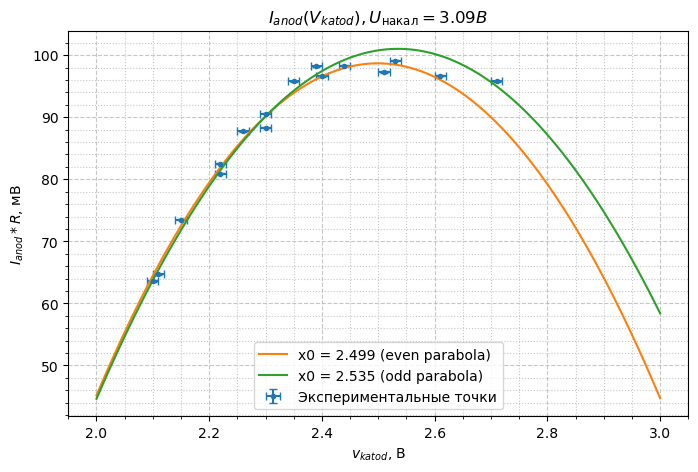

In [424]:
fig1_zoom, ax1_zoom = plot(V_katod_1_[8:24], I_anod_1_[8:24], [sigma_V_katod] * len(V_katod_1[8:24]), [sigma_V_anod] * len(I_anod_1[8:24]),
             "$v_{katod}$, В", "$I_{anod} * R$, мВ", "$I_{anod}(V_{katod}), U_{\\text{накал}} = 3.09 В$")

ax1_zoom.plot(x_fit_max, poly1even_max(x_fit_max), label=f'x0 = {x0_even_max:.3f} (even parabola)')
ax1_zoom.plot(x_fit_max, poly1odd_max(x_fit_max), label=f'x0 = {x0_odd_max:.3f} (odd parabola)')
ax1_zoom.legend()
ax1_zoom

<Axes: title={'center': '$I_{anod}(V_{katod}), U_{\\text{накал}} = 3.09 В$'}, xlabel='$v_{katod}$, В', ylabel='$I_{anod} * R$, мВ'>

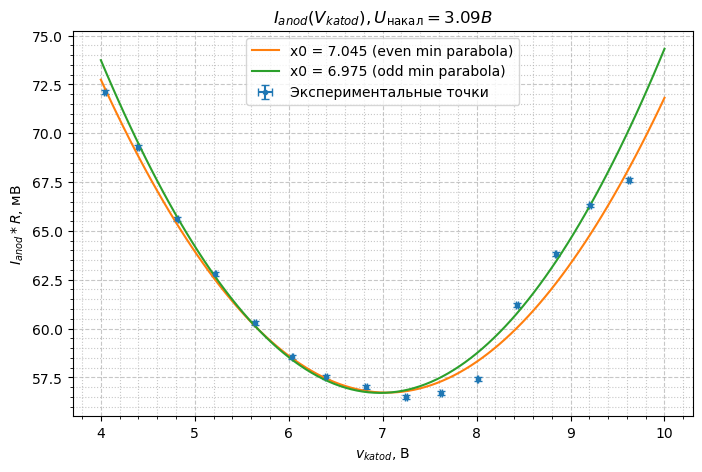

In [425]:
fig1_zoom_min, ax1_zoom_min = plot(V_katod_1_[34:49], I_anod_1_[34:49], [sigma_V_katod] * len(V_katod_1[34:49]), [sigma_V_anod] * len(I_anod_1[34:49]),
             "$v_{katod}$, В", "$I_{anod} * R$, мВ", "$I_{anod}(V_{katod}), U_{\\text{накал}} = 3.09 В$")

ax1_zoom_min.plot(x_fit_min, poly1even_min(x_fit_min), label=f'x0 = {x0_even_min:.3f} (even min parabola)')
ax1_zoom_min.plot(x_fit_min, poly1odd_min(x_fit_min), label=f'x0 = {x0_odd_min:.3f} (odd min parabola)')
ax1_zoom_min.legend()
ax1_zoom_min

In [426]:
x0_max_1 = np.mean([x0_even_min, x0_odd_min])
x0_max_1

np.float64(7.009809374702227)

### Вторая серия измерений

In [427]:
I_nakala_2 = 2.88
V_katod_2 = [0.08, 0.42, 0.78, 1.22, 1.60, 1.81,  1.9,  2.0, 2.09, 2.14, 2.21, 2.25, 2.31, 2.35, 2.40, 2.46, 2.53, 2.60, 2.71, 2.80, 2.33, 2.37, 2.40, 2.43, 2.34, 2.49, 2.58, 2.66, 2.75, 3.20, 3.57, 4.01, 4.40, 4.81, 5.17, 5.61, 6.02, 6.42, 6.83, 7.24, 7.66, 8.05, 8.42, 8.81, 9.22, 9.62, 10.03, 10.44] #  V
I_anod_2  = [ 0.1,    0,    0,  0.1, 0.84, 6.55, 15.2, 28.4, 43.3, 52.0, 60.4, 64.6, 68.9, 71.1, 72.0, 71.6, 70.1, 66.8, 62.7, 59.2, 69.5, 70.7, 71.1, 71.4, 70.7, 70.8, 67.6, 64.3, 60.7, 49.3, 44.6, 41.3, 39.1, 37.2, 35.7, 34.2, 33.3, 32.7, 32.2, 32.1, 32.3, 32.8, 33.7, 35.5, 36.9, 37.3,  38.8,  42.2] # mV

VAX_2 = list(zip(V_katod_2, I_anod_2))
VAX_2_ = sorted(VAX_2, key=lambda x: x[0])

V_katod_2_ = [vax[0] for vax in VAX_2_]
I_anod_2_  = [vax[1] for vax in VAX_2_]

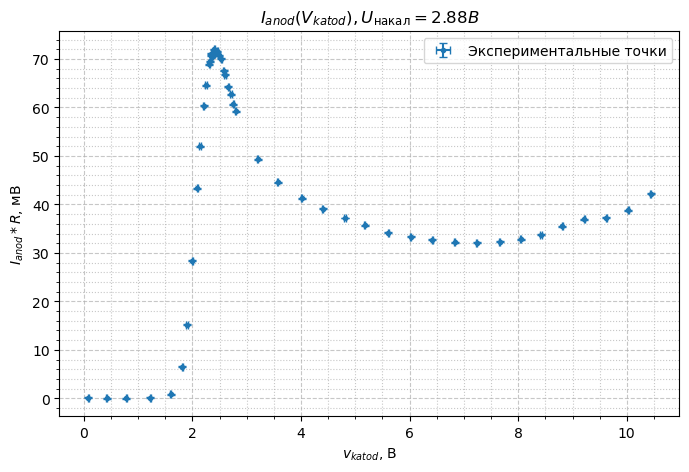

In [428]:
fig2, ax2 = plot(V_katod_2_, I_anod_2_, [sigma_V_katod] * len(V_katod_2), [sigma_V_anod] * len(I_anod_2),
             "$v_{katod}$, В", "$I_{anod} * R$, мВ", "$I_{anod}(V_{katod}), U_{\\text{накал}} = 2.88 В$")

In [429]:
parabola_2_even_max, cov_2_even_max = np.polyfit(V_katod_2_[8:28:2], I_anod_2_[8:28:2], deg=2, w=[1/sigma_V_anod] * len(I_anod_2_[8:28:2]), cov=True)
parabola_2_odd_max,  cov_2_odd_max  = np.polyfit(V_katod_2_[9:28:2], I_anod_2_[9:28:2], deg=2, w=[1/sigma_V_anod] * len(I_anod_2_[9:28:2]), cov=True)

x0_even_max, err_even_max = get_x0_with_error(parabola_2_even_max, cov_2_even_max)
x0_odd_max, err_odd_max   = get_x0_with_error(parabola_2_odd_max, cov_2_odd_max)

V_max = np.mean([x0_even_max, x0_odd_max])
sigma_V_max = np.sqrt(err_even_max ** 2 + err_odd_max ** 2)
latex_measurement("x0_{max}", V_max, sigma_V_max, "В", 2)

parabola_2_even_min, cov_2_even_min = np.polyfit(V_katod_2_[32:47:2], I_anod_2_[32:47:2], deg=2, w=[1/sigma_V_anod] * len(I_anod_2_[32:47:2]), cov=True)
parabola_2_odd_min,  cov_2_odd_min  = np.polyfit(V_katod_2_[31:47:2], I_anod_2_[31:47:2], deg=2, w=[1/sigma_V_anod] * len(I_anod_2_[31:47:2]), cov=True)

x0_even_min, err_even_min = get_x0_with_error(parabola_2_even_min, cov_2_even_min)
x0_odd_min, err_odd_min   = get_x0_with_error(parabola_2_odd_min, cov_2_odd_min)

V_min = np.mean([x0_even_min, x0_odd_min])
sigma_V_min = np.sqrt(err_even_min ** 2 + err_odd_min ** 2)
latex_measurement("x0_{min}", V_min, sigma_V_min, "В", 2)

poly2even_max = np.poly1d(parabola_2_even_max)
poly2odd_max  = np.poly1d(parabola_2_odd_max)

poly2even_min = np.poly1d(parabola_2_even_min)
poly2odd_min  = np.poly1d(parabola_2_odd_min)

$x0_{max} = (2.47 \pm 0.01)\ \text{В} \ (\varepsilon \approx 0.51\ \%)$
$x0_{min} = (7.16 \pm 0.08)\ \text{В} \ (\varepsilon \approx 1.06\ \%)$


In [430]:
E2 = V_min * electron
E1 = V_max * electron

l =  h_plank * np.sqrt(5) / np.sqrt(32 * m_electron * (E2 - E1))
sigma_l = h_plank * np.sqrt(5) / np.sqrt(32 * m_electron) * np.sqrt(((sigma_V_max * electron + sigma_V_min * electron) / np.sqrt(E2 - E1)**3)**2)
latex_measurement("l", l, sigma_l, "м", 2)

U_0 = 4/5*E2 - 9/5*E1
latex_measurement("U_0", U_0 / electron, np.sqrt((4/5*sigma_V_min * electron)**2 + (9/5 * sigma_V_max * electron)**2) / electron, "eV", 2)

sigma_V_max

$l = (3.17 \pm 0.06)\ \times 10^{-10} ~\text{м} \ (\varepsilon \approx 1.89\ \%)$
$U_0 = (1.29 \pm 0.06)\ \text{eV} \ (\varepsilon \approx 5.05\ \%)$


np.float64(0.012546959136201576)

In [431]:
x0_even_max = - parabola_2_even_max[1] / (2 * parabola_2_even_max[0])
x0_odd_max  = - parabola_2_odd_max[1]  / (2 * parabola_2_odd_max[0])

x0_even_min = - parabola_2_even_min[1] / (2 * parabola_2_even_min[0])
x0_odd_min  = - parabola_2_odd_min[1]  / (2 * parabola_2_odd_min[0])

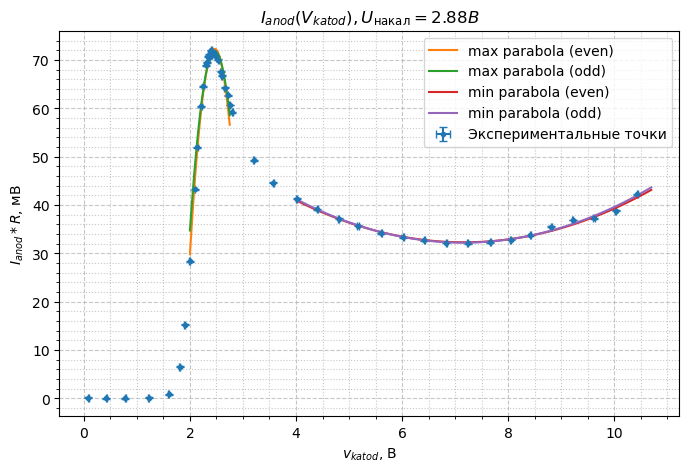

In [432]:
x_fit_max = np.linspace(2, 2.75, 100)
x_fit_min = np.linspace(4, 10.7, 100)
ax2.plot(x_fit_max, poly2even_max(x_fit_max), label='max parabola (even)')
ax2.plot(x_fit_max, poly2odd_max(x_fit_max), label='max parabola (odd)')
ax2.plot(x_fit_min, poly2even_min(x_fit_min), label='min parabola (even)')
ax2.plot(x_fit_min, poly2odd_min(x_fit_min), label='min parabola (odd)')
ax2.legend()
fig2

<Axes: title={'center': '$I_{anod}(V_{katod}), U_{\\text{накал}} = 2.88 В$'}, xlabel='$v_{katod}$, В', ylabel='$I_{anod} * R$, мВ'>

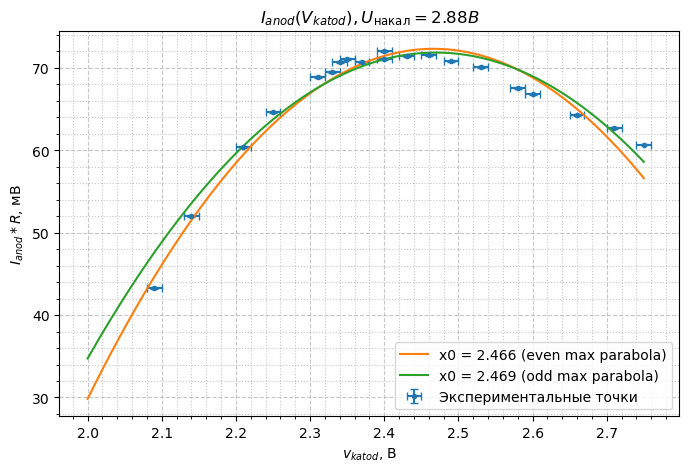

In [433]:
fig2_zoom, ax2_zoom = plot(V_katod_2_[8:28], I_anod_2_[8:28], [sigma_V_katod] * len(V_katod_2[8:28]), [sigma_V_anod] * len(I_anod_2[8:28]),
             "$v_{katod}$, В", "$I_{anod} * R$, мВ", "$I_{anod}(V_{katod}), U_{\\text{накал}} = 2.88 В$")

ax2_zoom.plot(x_fit_max, poly2even_max(x_fit_max), label=f'x0 = {x0_even_max:.3f} (even max parabola)')
ax2_zoom.plot(x_fit_max, poly2odd_max(x_fit_max), label=f'x0 = {x0_odd_max:.3f} (odd max parabola)')
ax2_zoom.legend()
ax2_zoom

<Axes: title={'center': '$I_{anod}(V_{katod}), U_{\\text{накал}} = 2.88 В$'}, xlabel='$v_{katod}$, В', ylabel='$I_{anod} * R$, мВ'>

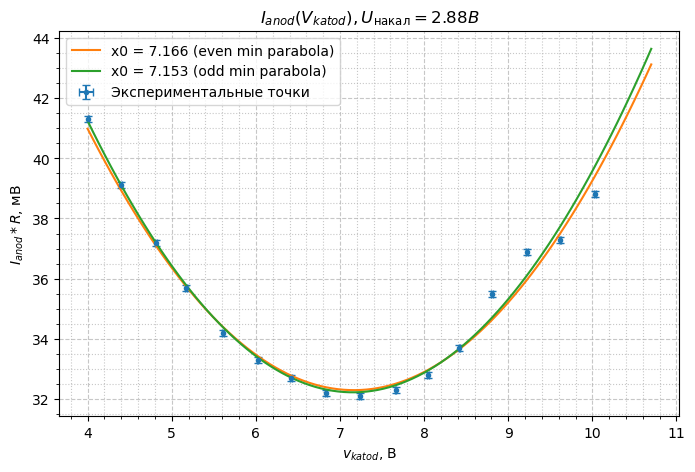

In [434]:
fig2_zoom_min, ax2_zoom_min = plot(V_katod_2_[31:47], I_anod_2_[31:47], [sigma_V_katod] * len(V_katod_2[31:47]), [sigma_V_anod] * len(I_anod_2[31:47]),
             "$v_{katod}$, В", "$I_{anod} * R$, мВ", "$I_{anod}(V_{katod}), U_{\\text{накал}} = 2.88 В$")

ax2_zoom_min.plot(x_fit_min, poly2even_min(x_fit_min), label=f'x0 = {x0_even_min:.3f} (even min parabola)')
ax2_zoom_min.plot(x_fit_min, poly2odd_min(x_fit_min), label=f'x0 = {x0_odd_min:.3f} (odd min parabola)')
ax2_zoom_min.legend()
ax2_zoom_min

Использую пары: (V_katod_1, I_anod_1) и (V_katod_1_, I_anod_1_)


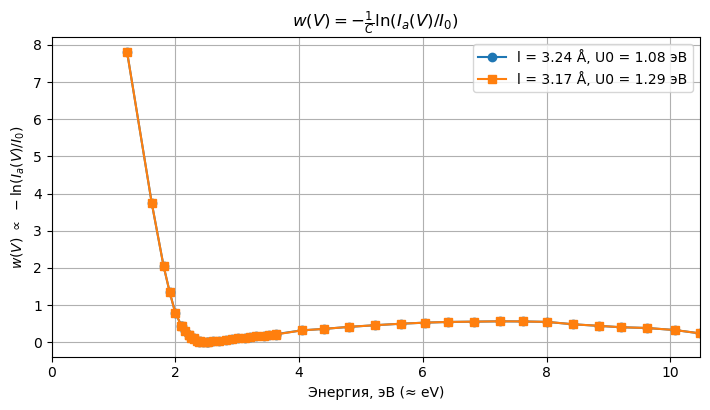

In [435]:
E1   = 2.48                  # эВ, для обеих строк
U0_1 = 1.08                  # эВ, строка 1
U0_2 = 1.29                  # эВ, строка 2
label1 = "l = 3.24 Å, U0 = 1.08 эВ"
label2 = "l = 3.17 Å, U0 = 1.29 эВ"
out_png = "w_both_to_E2.png"

def _pick_pairs(ns):
    # try common names first
    prefer = [
        ("V_katod_1",  "I_anod_1"),
        ("V_katod_1_", "I_anod_1_"),
        ("V_katod2",   "I_anod2"),
        ("V1", "I1"), ("V2","I2"),
    ]
    pairs = []
    for vname, iname in prefer:
        if vname in ns and iname in ns:
            v, i = np.ravel(np.array(ns[vname], float)), np.ravel(np.array(ns[iname], float))
            if v.size == i.size and v.size >= 5:
                pairs.append((vname, iname, v, i))
    # fallback: any V_* and I_* with same length
    if len(pairs) < 2:
        Vc = [(k, np.ravel(np.array(ns[k], float))) for k in ns if k.startswith("V_")]
        Ic = [(k, np.ravel(np.array(ns[k], float))) for k in ns if k.startswith("I_")]
        for vk, v in Vc:
            for ik, i in Ic:
                if v.size == i.size and v.size >= 5:
                    pairs.append((vk, ik, v, i))
    # dedupe by unique names
    seen, out = set(), []
    for vk, ik, v, i in pairs:
        if (vk,ik) not in seen:
            out.append((vk, ik, v, i))
            seen.add((vk,ik))
        if len(out) == 2:
            break
    if len(out) < 2:
        raise RuntimeError("Не нашёл две пары массивов V/I (V_*, I_*). Укажи их явно в коде.")
    return out[:2]

vk1, ik1, V1, I1 = _pick_pairs(globals())[0]
vk2, ik2, V2, I2 = _pick_pairs(globals())[1]
print(f"Использую пары: ({vk1}, {ik1}) и ({vk2}, {ik2})")

# ---------- BUILD w(V) = -ln(I/I0) up to E2 ----------
def prep_w(V, I, E2):
    mask = np.isfinite(V) & np.isfinite(I) & (I > 0)
    V = np.asarray(V)[mask]; I = np.asarray(I)[mask]
    order = np.argsort(V); V = V[order]; I = I[order]
    m = (V > 0) & (V <= E2)
    Vc, Ic = V[m], I[m]
    if Vc.size < 4:  # если вдруг мало точек в окне — возьмём первые 40% данных
        n = max(4, int(0.4*V.size))
        Vc, Ic = V[:n], I[:n]
    I0 = float(np.nanmax(Ic))
    w  = -np.log(Ic / I0)
    return Vc, w

E2_1 = 4*(E1 + U0_1) - U0_1
E2_2 = 4*(E1 + U0_2) - U0_2
V1c, w1 = prep_w(V1, I1, E2_1)
V2c, w2 = prep_w(V2, I2, E2_2)

Emax = min(np.nanmax(V1c), np.nanmax(V2c), E2_1, E2_2)

# ---------- PLOT ----------
plt.figure(figsize=(7.2,4.2))
plt.plot(V1c, w1, marker='o', linestyle='-', label=f"{label1}")
plt.plot(V2c, w2, marker='s', linestyle='-', label=f"{label2}")
plt.xlabel("Энергия, эВ (≈ eV)")
plt.ylabel(r"$w(V)\ \propto\ -\ln(I_a(V)/I_0)$")
plt.title(r"$w(V)=-\frac{1}{C}\ln(I_a(V)/I_0)$")
plt.xlim(0, Emax)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(out_png, dpi=160)
plt.show()